In [1]:
import pandas as pd

# Load the data
hpg_data = pd.read_csv('HPG.csv', parse_dates=['Date'])
mwg_data = pd.read_csv('MWG.csv', parse_dates=['Date'])

# Convert 'Price' column to numeric
hpg_data['Price'] = pd.to_numeric(hpg_data['Price'].str.replace(',', ''), errors='coerce')
mwg_data['Price'] = pd.to_numeric(mwg_data['Price'].str.replace(',', ''), errors='coerce')

# Set the 'Date' column as the index
hpg_data.set_index('Date', inplace=True)
mwg_data.set_index('Date', inplace=True)

# Descriptive statistics
hpg_stats = hpg_data['Price'].describe()
mwg_stats = mwg_data['Price'].describe()

# Additional statistics
hpg_range = hpg_data['Price'].max() - hpg_data['Price'].min()
mwg_range = mwg_data['Price'].max() - mwg_data['Price'].min()

hpg_stats['range'] = hpg_range
mwg_stats['range'] = mwg_range

# Save descriptive statistics to CSV
hpg_stats.to_csv('hpg_descriptive_statistics.csv')
mwg_stats.to_csv('mwg_descriptive_statistics.csv')

hpg_stats, mwg_stats

(count     1557.000000
 mean     19974.485934
 std       9174.277121
 min       7411.800000
 25%      12317.800000
 50%      17727.000000
 75%      25136.000000
 max      43895.800000
 range    36484.000000
 Name: Price, dtype: float64,
 count     1557.000000
 mean     42164.635838
 std      14309.888188
 min      19198.000000
 25%      28747.000000
 50%      39600.000000
 75%      49624.000000
 max      79582.000000
 range    60384.000000
 Name: Price, dtype: float64)

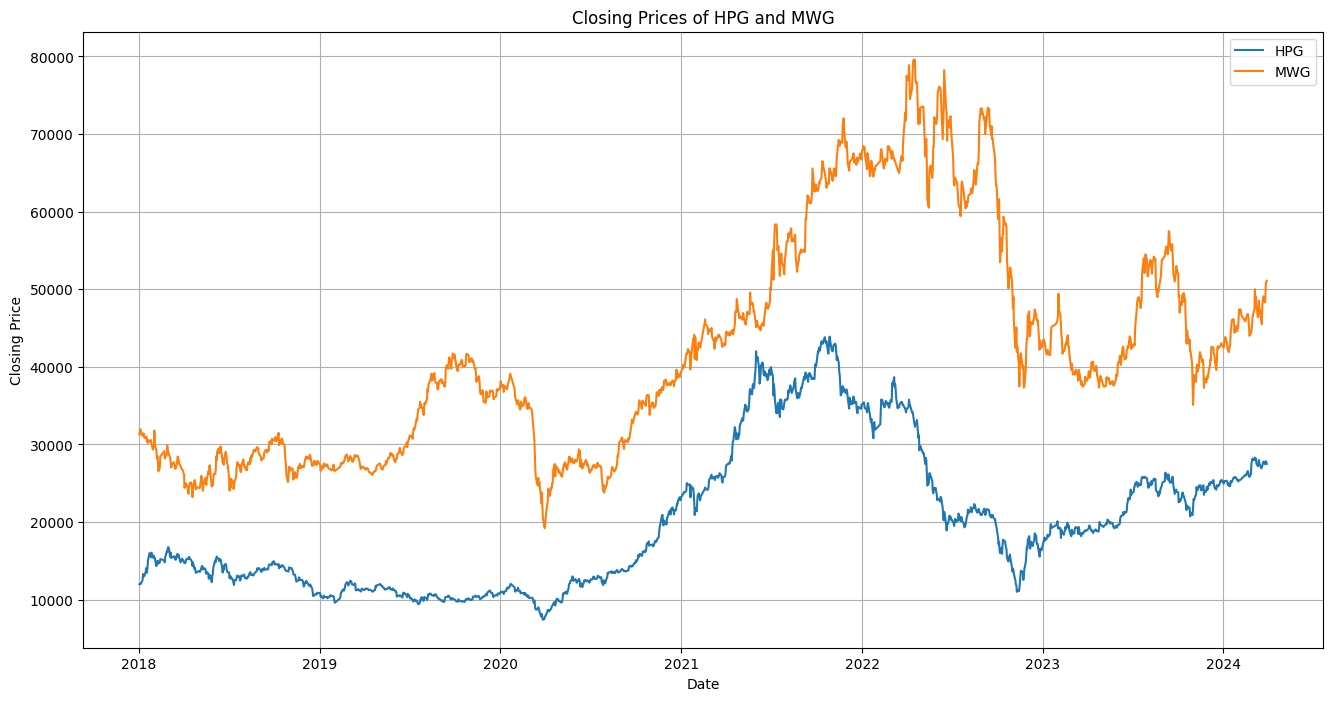

In [3]:
import matplotlib.pyplot as plt

# Plotting the closing price curves with improvements
plt.figure(figsize=(16, 8))
plt.plot(hpg_data.index, hpg_data['Price'], label='HPG')
plt.plot(mwg_data.index, mwg_data['Price'], label='MWG')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Closing Prices of HPG and MWG')
plt.legend()
plt.grid(True)

# Save the plot
plt.savefig('closing_price.png')
plt.show()

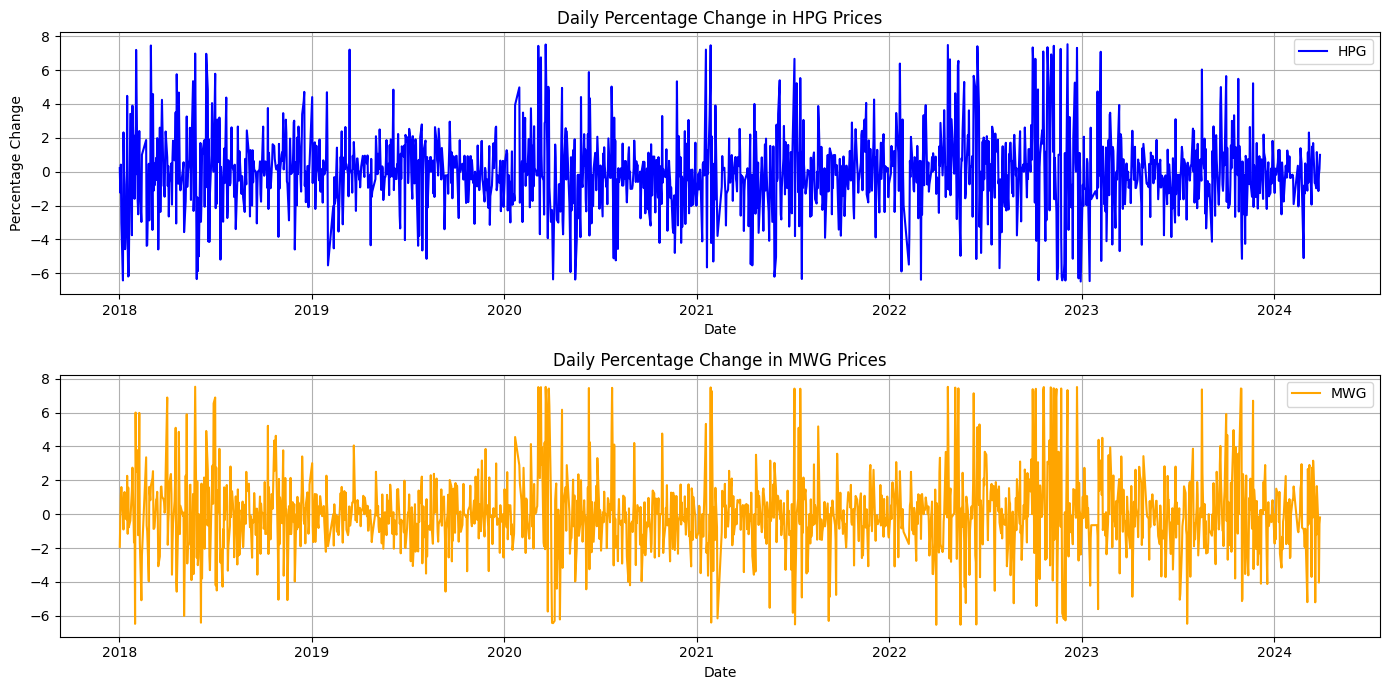

In [10]:
# Calculate daily percentage change
hpg_data['Pct_Change'] = hpg_data['Price'].pct_change() * 100
mwg_data['Pct_Change'] = mwg_data['Price'].pct_change() * 100

# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 7), sharey=True)

# Plot HPG daily percentage change
ax1.plot(hpg_data.index, hpg_data['Pct_Change'], label='HPG', color='blue')
ax1.set_title('Daily Percentage Change in HPG Prices')
ax1.set_xlabel('Date')
ax1.set_ylabel('Percentage Change')
ax1.legend()
ax1.grid(True)

# Plot MWG daily percentage change
ax2.plot(mwg_data.index, mwg_data['Pct_Change'], label='MWG', color='orange')
ax2.set_title('Daily Percentage Change in MWG Prices')
ax2.set_xlabel('Date')
ax2.legend()
ax2.grid(True)

# Show plot
plt.tight_layout()
plt.show()

## Remarks on Price Changes
### HPG (Hoa Phat Group)
- Price Trend: The price of HPG shows significant fluctuations over the observed period. There are periods of both decline and growth.
- Volatility: The standard deviation of 9,174.28 indicates substantial volatility in the stock prices.
- Growth and Decline: The stock saw significant growth phases around 2021 but experienced notable declines afterward.
- Recovery: The stock showed a recovery trend towards the end of the observed period.

### MWG (Mobile World Investment Corporation)
- Price Trend: MWG shows an overall increasing trend with notable peaks around mid-2021 and some volatility thereafter.
- Volatility: The higher standard deviation of 14,309.89 reflects greater volatility compared to HPG.
- Significant Peaks: The stock price peaked at 79,582.00, showing substantial growth from its minimum value.
- Consistent Growth: Despite fluctuations, MWG maintained a relatively consistent upward trend over the period.

### Conclusion: 
HPG shows considerable volatility with significant periods of both decline and growth. MWG demonstrates a more consistent upward trend with higher overall volatility.